### Gradient Descent Algoritmasi

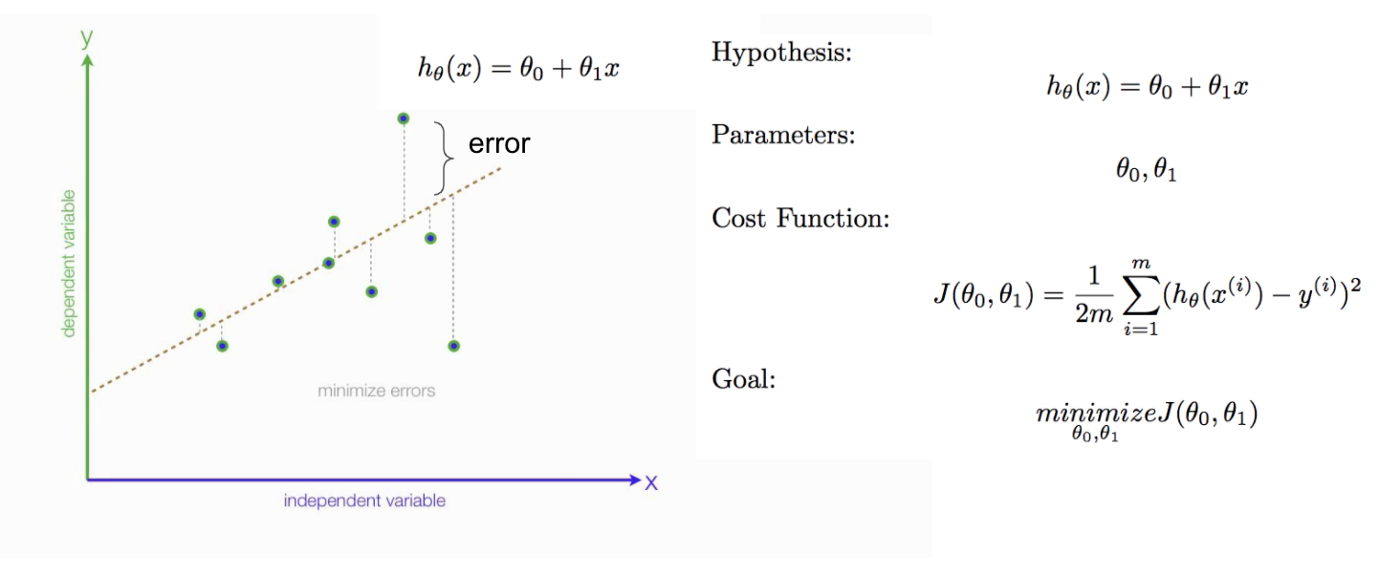

In [88]:
import numpy as np
import matplotlib.pyplot as plt

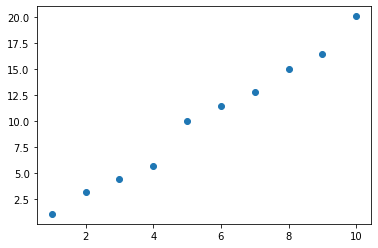

In [89]:
"""grafiğe yerleştirilecek rastgele değerler oluşturalım"""
x=np.arange(1,11)
y=np.array([1.1,3.2,4.5,5.7,10,11.5,12.8,15,16.5,20.1])
plt.scatter(x,y);

In [90]:
"""       H(x) = teta0 + teta1*x    """
teta = np.ones((2,1)) #tetalara gecici olarak 1 verdik
egitimSayisi = len(x)  #eğitim sayımızı x'in boyutuna eşitledik
egitimSayisi

10

In [91]:
teta

array([[1.],
       [1.]])

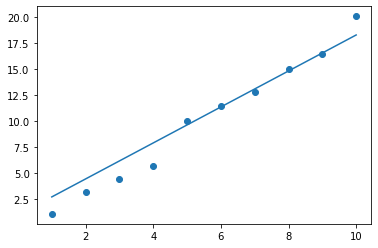

In [92]:
""" J(teta)=1/(2m) * SUM(h(x)-y)"""

plt.scatter(x,y)

errorFonk= 1/(2*egitimSayisi)*pow((teta[0]+teta[1]*x-y),2) #error fonksiyonumuz

epsilon=10e-9  #maximum hatamızı söyler
learningRate=0.00001  #öğrenme katsayımız

i=0
deneme=0
max_deneme=20000 #döngü sayısını sınırlandırmak için yaptık

while sum(errorFonk)>epsilon and  deneme<max_deneme:       
    while  i<egitimSayisi:
        temp0=teta[0] - learningRate*(1/egitimSayisi) * (teta[0] + teta[1] * x[i] - y[i])
        temp1=teta[1] - learningRate*(1/(egitimSayisi)) * (teta[0] + teta[1] * x[i] - y[i]) * x[i]
        teta[0]=temp0
        teta[1]=temp1
        errorFonk[i]= 1/(2*egitimSayisi)*pow((teta[0]+teta[1]*x[i]-y[i]),2)        
        i+=1
    deneme+=1    
    i=0
    
plt.plot(x,teta[0]+x*teta[1])
plt.show()

In [131]:
teta[0][0], teta[1][0]

(1.005041986499938, 1.729437339099917)

In [120]:
# Alternative solution with numpy.polyfit function
teta1,teta0 = np.polyfit(x,y,deg=1)
teta1,teta0

(2.0569696969696967, -1.2733333333333416)

In [109]:
# Alternative Solution with sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1, 1),y)
b0 = model.intercept_
b1 = model.coef_[0]
b0,b1

(-1.2733333333333317, 2.0569696969696967)

**intercept  and coeff are same with sklearn and numpy**

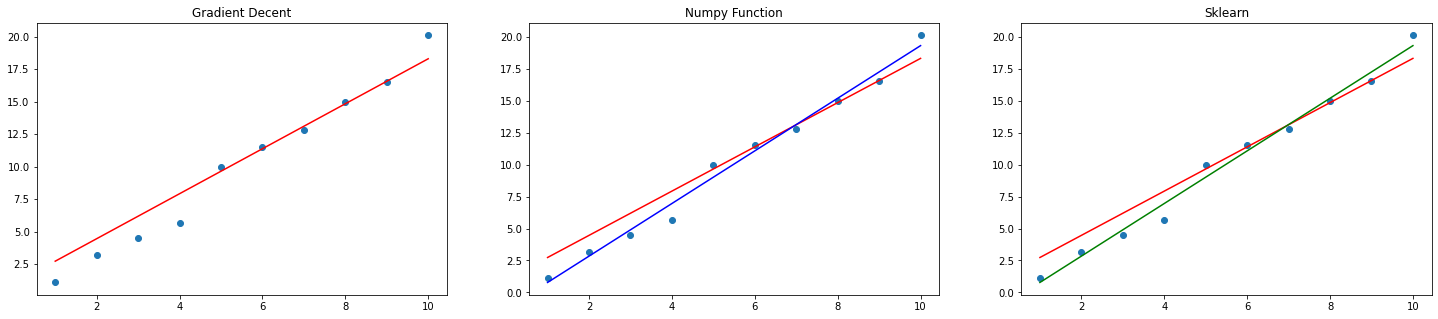

In [140]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
plt.scatter(x,y)
plt.plot(x,x*teta[1][0]+teta[0][0],color='red')
plt.title('Gradient Decent')

plt.subplot(1,3,2)
plt.scatter(x,y)
plt.plot(x,x*teta[1][0]+teta[0][0],color='red')
plt.plot(x,x*teta1+teta0,color='blue')
plt.title('Numpy Function')

plt.subplot(1,3,3)
plt.scatter(x,y)
plt.plot(x,x*teta[1][0]+teta[0][0],color='red')
plt.plot(x,x*b1+b0,color='green')
plt.title('Sklearn')
plt.show()